## DBSCAN

In [2]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


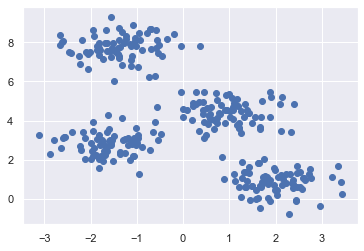

In [4]:
sns.set()
X,y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state =0)
plt.scatter(X[:,0],X[:,1])

In [5]:
vecino = NearestNeighbors(n_neighbors=2)
modelo = vecino.fit(X)
distances, indices = modelo.kneighbors(X)

In [6]:
distances

array([[0.        , 0.49822928],
       [0.        , 0.08829225],
       [0.        , 0.12019666],
       [0.        , 0.11049628],
       [0.        , 0.31064694],
       [0.        , 0.61124146],
       [0.        , 0.35774854],
       [0.        , 0.01966341],
       [0.        , 0.29733787],
       [0.        , 0.03349706],
       [0.        , 0.08393989],
       [0.        , 0.28828177],
       [0.        , 0.14403194],
       [0.        , 0.3005636 ],
       [0.        , 0.12156709],
       [0.        , 0.1666952 ],
       [0.        , 0.02207558],
       [0.        , 0.11856671],
       [0.        , 0.07770645],
       [0.        , 0.01593125],
       [0.        , 0.20980317],
       [0.        , 0.06166964],
       [0.        , 0.26472336],
       [0.        , 0.22898617],
       [0.        , 0.17967984],
       [0.        , 0.56539061],
       [0.        , 0.09434692],
       [0.        , 0.11509095],
       [0.        , 0.40987856],
       [0.        , 0.23293743],
       [0.

#### Técnica del codo

En la gráfica se muestra la frencuencia de las distancias.

Se escoge el 0.3 como epsilon por que es el punto en donde se empieza a notar el cambio en la curva para hacer la prueba incial, este número se puede ir ajustando para encontrar la mejor "clusterización".

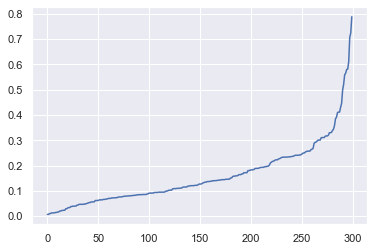

In [7]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [8]:
m = DBSCAN(eps=0.3, min_samples=5) # 5 vecinos cerca para que un punto se considere core point
m.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [9]:
clusters= m.labels_

In [14]:
color = ['royalblue','maroon','forestgreen','mediumorchid','tan','deeppink','olive','goldenrod','lightcyan','navy']
vectorizar = np.vectorize(lambda x: color[x % len(color)])

In [ ]:
plt.scatter(X[:,0],X[:,1],c=vectorizar(clusters))

#### Comparación con KMeans

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=10,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)

In [18]:
y_km = km.fit_predict(X)

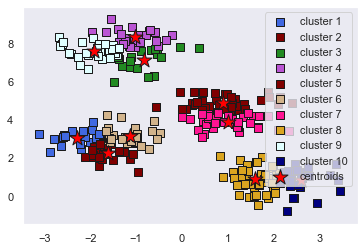

In [19]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='royalblue',marker='s',edgecolor='k',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='maroon',marker='s',edgecolor='k',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='forestgreen',marker='s',edgecolor='k',label='cluster 3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],s=50,c='mediumorchid',marker='s',edgecolor='k',label='cluster 4')
plt.scatter(X[y_km==4,0],X[y_km==4,1],s=50,c='maroon',marker='s',edgecolor='k',label='cluster 5')
plt.scatter(X[y_km==5,0],X[y_km==5,1],s=50,c='tan',marker='s',edgecolor='k',label='cluster 6')
plt.scatter(X[y_km==6,0],X[y_km==6,1],s=50,c='deeppink',marker='s',edgecolor='k',label='cluster 7')
plt.scatter(X[y_km==7,0],X[y_km==7,1],s=50,c='goldenrod',marker='s',edgecolor='k',label='cluster 8')
plt.scatter(X[y_km==8,0],X[y_km==8,1],s=50,c='lightcyan',marker='s',edgecolor='k',label='cluster 9')
plt.scatter(X[y_km==9,0],X[y_km==9,1],s=50,c='navy',marker='s',edgecolor='k',label='cluster 10')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',edgecolor='k',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()